In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
#importing RFE and Linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head(40)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [4]:
import numpy as np
round(np.mean(df['cnt']),2)

4508.01

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:



df.duplicated().sum()

0

In [7]:


df.drop(['instant'],inplace=True,axis=1)

In [8]:

df.drop(['dteday'],inplace=True,axis=1)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


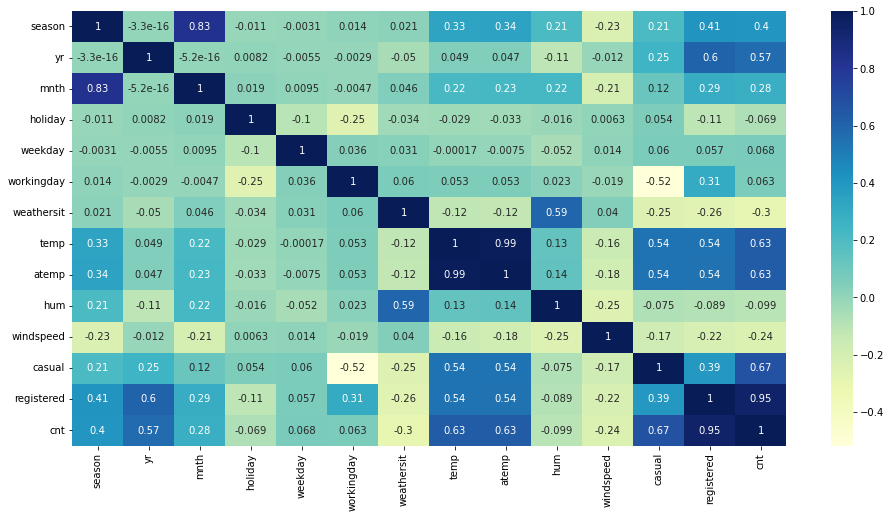

In [10]:

plt.figure(figsize=(16,8))
cor=df.corr()
# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# Replacing the categorical Columns

In [11]:
df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

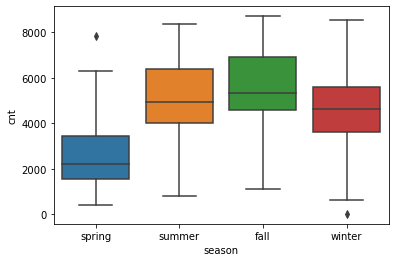

In [12]:
sns.boxplot(x='season', y='cnt', data=df)
plt.show()

 #More bikes are rented in fall and summer seasons

In [13]:
df['mnth'].replace({1:'January', 2:'February', 3:'March', 4:'April',5:'May',6:'June',7:'July',8:'August',9:'Sepetember',10:'October',11:'November',12:'December'},inplace=True)

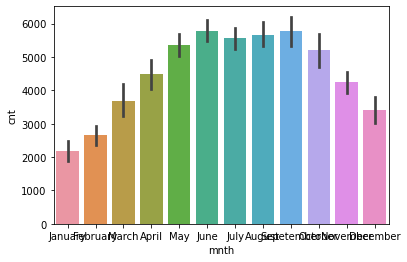

In [14]:
# plotting count across evry month
#observation : More bikes are  rented from May to October months
sns.barplot(x='mnth', y='cnt', data=df)
plt.show()

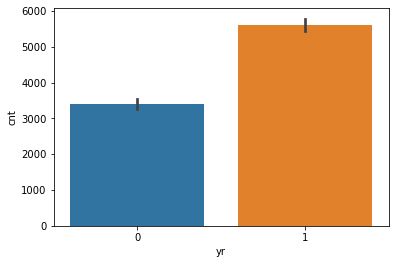

In [15]:
sns.barplot(x='yr', y='cnt', data=df)
plt.show()
#More number of bikes were rented in 2019 than in 2018.

In [16]:
df['weekday'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'},inplace=True)

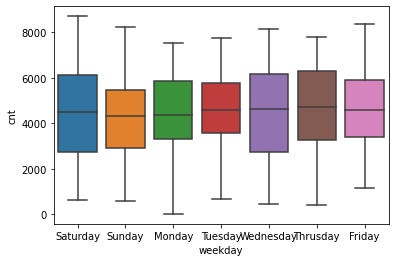

In [17]:
sns.boxplot(x='weekday', y=
            'cnt', data=df)
plt.show()
# Sales is more in Saturday and Wednesday

<AxesSubplot:xlabel='temp', ylabel='cnt'>

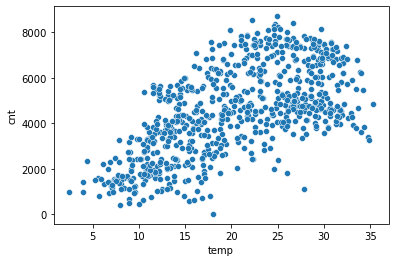

In [18]:





sns.scatterplot(df["temp"],df["cnt"])

# as temp increases the bikes selling are more . as we saw ppl are takingmore bikes in summer 

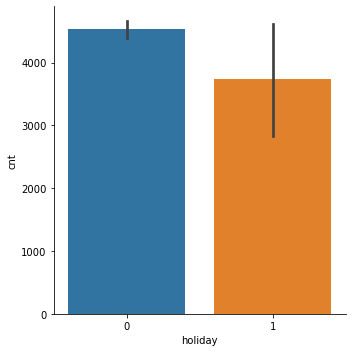

In [19]:
sns.catplot(data=df, x="holiday", y="cnt", kind="bar")
#ppl are taking more bikes when it is not a holiday


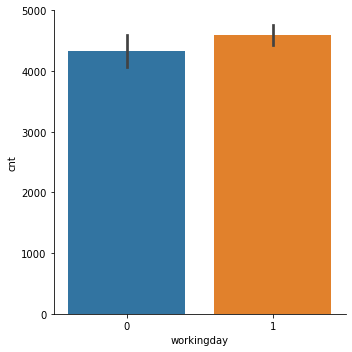

In [20]:
sns.catplot(data=df, x="workingday", y="cnt", kind="bar")
# obs: as we can see most of the ppl are biking on working day 

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

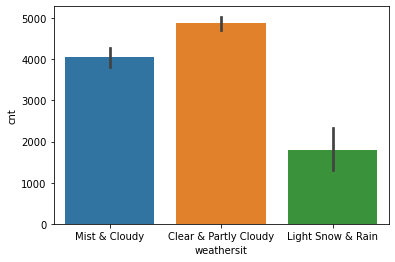

In [21]:
df['weathersit'].replace({1:'Clear & Partly Cloudy',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rainfall'},inplace=True)
sns.barplot(x='weathersit',y='cnt',data=df)

#If the weather is clear , then more bikes are rented. No bikes are rented in heavy weather.

In [22]:
#Auto EDA 
#pandas profiling, dtale, autoviz

#import sweetviz as sv 
#sweet_report = sv.analyze(df) 
#sweet_report.show_html('sweet_report.html')

<AxesSubplot:xlabel='hum', ylabel='cnt'>

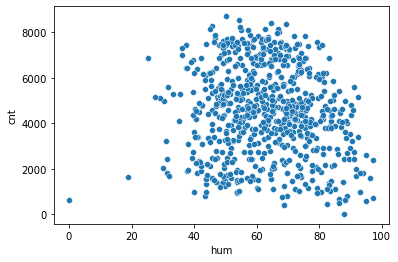

In [23]:
sns.scatterplot(df["hum"],df["cnt"])

# it has a negative  correlation as humidity increases count decreases

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

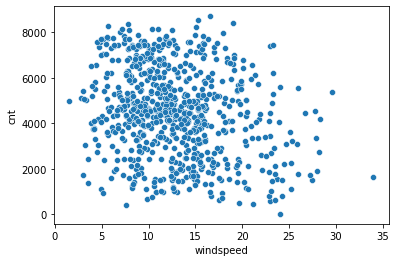

In [24]:
sns.scatterplot(df["windspeed"],df["cnt"])
# its a constant graph

<AxesSubplot:xlabel='temp', ylabel='Count'>

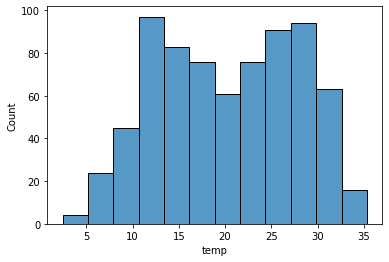

In [25]:
sns.histplot(df['temp'])
#more sales are during 11 degree and 30 degree

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

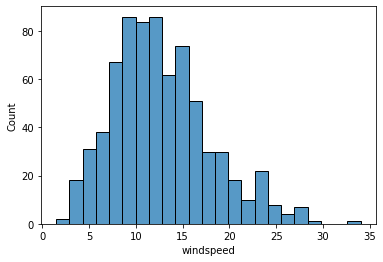

In [26]:
sns.histplot(df['windspeed'])


<AxesSubplot:xlabel='casual', ylabel='cnt'>

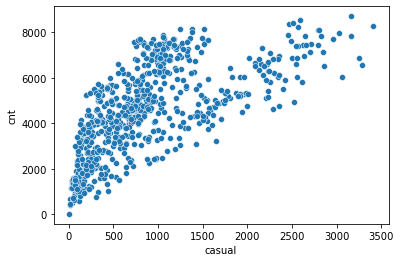

In [27]:
sns.scatterplot(df["casual"],df["cnt"])

<Figure size 1080x720 with 0 Axes>

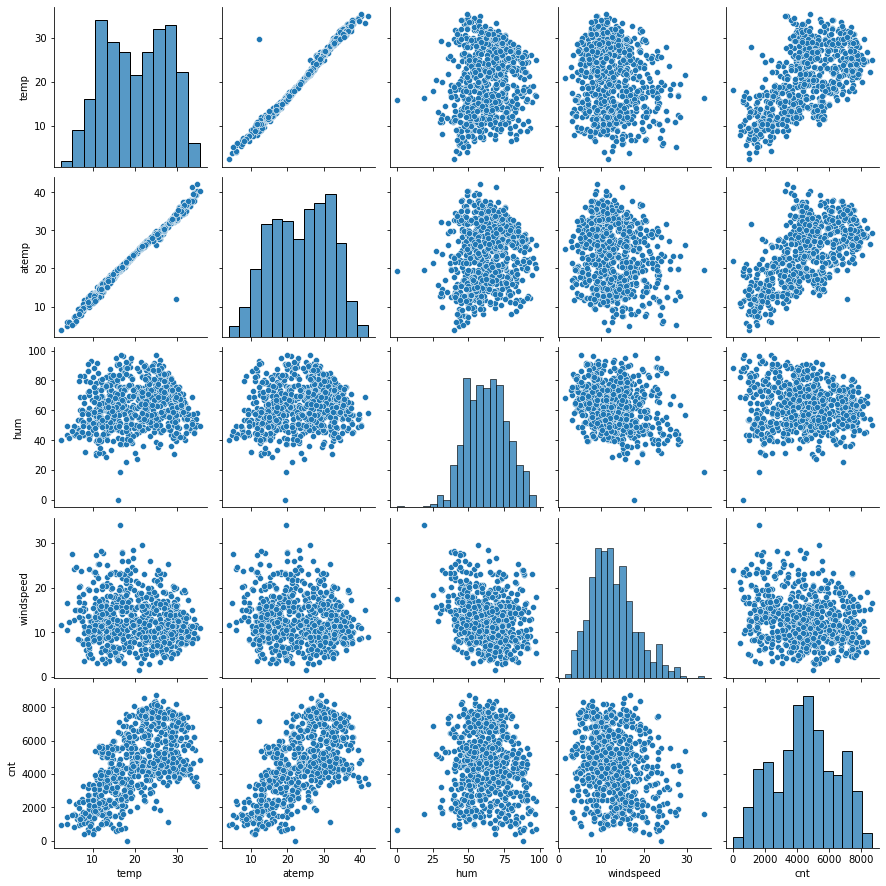

In [28]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(15,10))
sns.pairplot(df[num_vars])
plt.show()

In [29]:

df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these

In [30]:
df.drop(['atemp'],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Creating Dummy Variable

In [32]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"],drop_first=True)

In [33]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [34]:
scaler= MinMaxScaler()
#create a list of numeric var

num_vars=['hum','temp','windspeed',
         'cnt']

#2 . fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

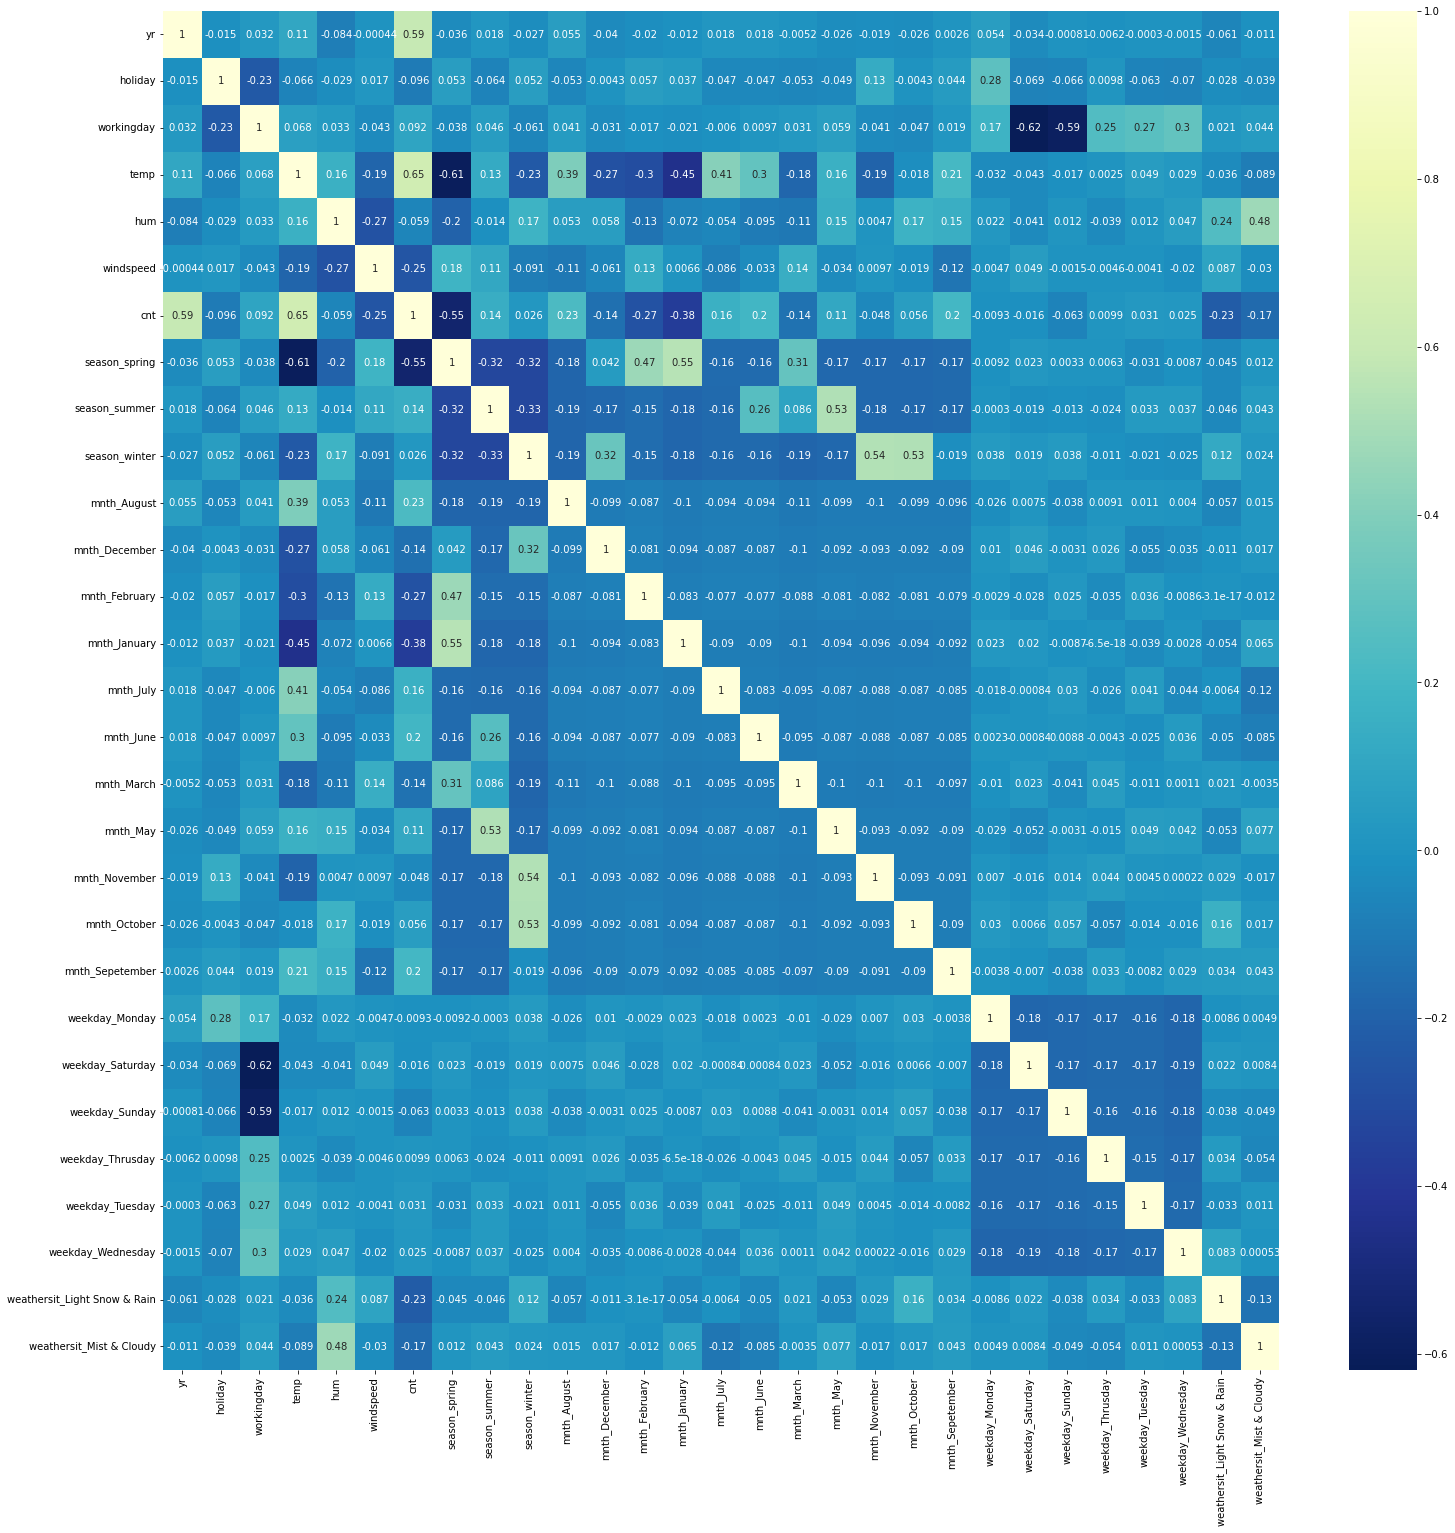

In [35]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu_r")
plt.show()

# Model Building

## Model 1

In [36]:
y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.params

const                           0.243106
yr                              0.232438
holiday                         0.010042
workingday                      0.096177
temp                            0.445359
hum                            -0.151473
windspeed                      -0.186010
season_spring                  -0.044834
season_summer                   0.043002
season_winter                   0.107632
mnth_August                     0.020376
mnth_December                  -0.044277
mnth_February                  -0.032441
mnth_January                   -0.063315
mnth_July                      -0.033848
mnth_June                       0.004602
mnth_March                      0.001274
mnth_May                        0.024673
mnth_November                  -0.039879
mnth_October                    0.007546
mnth_Sepetember                 0.085938
weekday_Monday                 -0.020931
weekday_Saturday                0.095554
weekday_Sunday                  0.041333
weekday_Thrusday

In [38]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          3.00e-181
Time:                        22:16:29   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2431      0.035      6.888      0.000       0.174       0.312
yr                               0.2324      0.008     28.819      0.000       0.217       0.248
holiday                          0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                       0.0962      0.012      7.835      0.000       0.072       0.120
temp                             0.4454      0.046      9.628      0.000       0.354       0.536
hum                             -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                       -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring                   -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer                    0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                    0.1076      0.028      3.853      0.000       0.053       0.163
mnth_August                      0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_December                   -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_February                   -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_January                    -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                       -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                        0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_March                       0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                         0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_November                   -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_October                     0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sepetember                  0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Monday                  -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_Saturday                 0.0956      0.014      6.958      0.000       0.069       0.123
weekday_Sunday                   0.0413      0.014      2.964      0.003       0.014       0.069
weekday_Thrusday                -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_Tuesday                 -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_Wednesday               -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow & Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist & Cloudy        -0.0596      0.010     -5.709      0.000    

## Model 1 R2 =0.853

In [39]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
23,weekday_Sunday,inf
2,holiday,inf
3,workingday,inf
22,weekday_Saturday,inf
7,season_spring,10.75
9,season_winter,9.44
8,season_summer,8.27
4,temp,7.08
18,mnth_November,6.79
19,mnth_October,6.47


In [40]:
X_train=X_train.drop(['holiday'], axis=1)
#dropping holiday af it has infinite correlation 

# Fitting model after dropping holiday

In [41]:
X_train_sm=sm.add_constant(X_train)
lr =sm.OLS(y_train,X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.params

const                           0.253149
yr                              0.232438
workingday                      0.086134
temp                            0.445359
hum                            -0.151473
windspeed                      -0.186010
season_spring                  -0.044834
season_summer                   0.043002
season_winter                   0.107632
mnth_August                     0.020376
mnth_December                  -0.044277
mnth_February                  -0.032441
mnth_January                   -0.063315
mnth_July                      -0.033848
mnth_June                       0.004602
mnth_March                      0.001274
mnth_May                        0.024673
mnth_November                  -0.039879
mnth_October                    0.007546
mnth_Sepetember                 0.085938
weekday_Monday                 -0.020931
weekday_Saturday                0.085511
weekday_Sunday                  0.031291
weekday_Thrusday               -0.009131
weekday_Tuesday 

In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          3.00e-181
Time:                        22:16:44   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2531      0.052      4.859      0.000       0.151       0.356
yr                               0.2324      0.008     28.819      0.000       0.217       0.248
workingday                       0.0861      0.027      3.234      0.001       0.034       0.138
temp                             0.4454      0.046      9.628      0.000       0.354       0.536
hum                             -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                       -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring                   -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer                    0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                    0.1076      0.028      3.853      0.000       0.053       0.163
mnth_August                      0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_December                   -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_February                   -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_January                    -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                       -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                        0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_March                       0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                         0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_November                   -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_October                     0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sepetember                  0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Monday                  -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_Saturday                 0.0855      0.030      2.835      0.005       0.026       0.145
weekday_Sunday                   0.0313      0.030      1.035      0.301      -0.028       0.091
weekday_Thrusday                -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_Tuesday                 -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_Wednesday               -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow & Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist & Cloudy        -0.0596      0.010     -5.709      0.000      -0.080      -0.039
============================================================================

## After dropping holiday r2 score is  same !! Now let's check the VIF of other features

In [43]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,176.52
6,season_spring,10.75
2,workingday,10.10
8,season_winter,9.44
7,season_summer,8.27
21,weekday_Saturday,7.74
22,weekday_Sunday,7.30
3,temp,7.08
17,mnth_November,6.79
18,mnth_October,6.47


## Since the threshold for VIF is 5. The VIF Score should not be more than 5 
# we saw VIF for season_Spring  is more than 5 we have to drop it and the p value is more than 0.05

In [44]:

X_train=X_train.drop('season_spring',axis=1)

# Fitting model after dropping weekday_saturday

In [45]:
X_train_sm=sm.add_constant(X_train)
lr =sm.OLS(y_train,X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.params

const                           0.224895
yr                              0.232100
workingday                      0.087131
temp                            0.454248
hum                            -0.153638
windspeed                      -0.189082
season_summer                   0.068563
season_winter                   0.132705
mnth_August                     0.042918
mnth_December                  -0.048605
mnth_February                  -0.049935
mnth_January                   -0.080312
mnth_July                      -0.011867
mnth_June                       0.011079
mnth_March                     -0.010492
mnth_May                        0.023136
mnth_November                  -0.038681
mnth_October                    0.007491
mnth_Sepetember                 0.103876
weekday_Monday                 -0.020476
weekday_Saturday                0.085725
weekday_Sunday                  0.031883
weekday_Thrusday               -0.008787
weekday_Tuesday                -0.018036
weekday_Wednesda

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.68e-182
Time:                        22:16:55   Log-Likelihood:                 525.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2249      0.049      4.626      0.000       0.129       0.320
yr                               0.2321      0.008     28.751      0.000       0.216       0.248
workingday                       0.0871      0.027      3.268      0.001       0.035       0.140
temp                             0.4542      0.046      9.889      0.000       0.364       0.545
hum                             -0.1536      0.039     -3.983      0.000      -0.229      -0.078
windspeed                       -0.1891      0.026     -7.360      0.000      -0.240      -0.139
season_summer                    0.0686      0.020      3.462      0.001       0.030       0.107
season_winter                    0.1327      0.022      5.930      0.000       0.089       0.177
mnth_August                      0.0429      0.030      1.430      0.153      -0.016       0.102
mnth_December                   -0.0486      0.034     -1.449      0.148      -0.115       0.017
mnth_February                   -0.0499      0.031     -1.619      0.106      -0.111       0.011
mnth_January                    -0.0803      0.032     -2.538      0.011      -0.142      -0.018
mnth_July                       -0.0119      0.032     -0.374      0.708      -0.074       0.050
mnth_June                        0.0111      0.024      0.454      0.650      -0.037       0.059
mnth_March                      -0.0105      0.023     -0.450      0.653      -0.056       0.035
mnth_May                         0.0231      0.021      1.100      0.272      -0.018       0.064
mnth_November                   -0.0387      0.036     -1.062      0.289      -0.110       0.033
mnth_October                     0.0075      0.036      0.208      0.835      -0.063       0.078
mnth_Sepetember                  0.1039      0.030      3.507      0.000       0.046       0.162
weekday_Monday                  -0.0205      0.015     -1.334      0.183      -0.051       0.010
weekday_Saturday                 0.0857      0.030      2.838      0.005       0.026       0.145
weekday_Sunday                   0.0319      0.030      1.053      0.293      -0.028       0.091
weekday_Thrusday                -0.0088      0.016     -0.565      0.573      -0.039       0.022
weekday_Tuesday                 -0.0180      0.016     -1.161      0.246      -0.049       0.012
weekday_Wednesday               -0.0059      0.015     -0.396      0.692      -0.035       0.023
weathersit_Light Snow & Rain    -0.2533      0.026     -9.610      0.000      -0.305      -0.201
weathersit_Mist & Cloudy        -0.0591      0.010     -5.660      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       81.173   Durbin-Watson:                   2.055
Prob(Omnibus): 

## R2 score  after dropping season_spring=0.852

In [47]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,153.32
2,workingday,10.09
20,weekday_Saturday,7.74
21,weekday_Sunday,7.29
3,temp,6.97
16,mnth_November,6.78
17,mnth_October,6.47
7,season_winter,6.04
9,mnth_December,5.63
11,mnth_January,5.23


## Using RFE

In [48]:


lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15)# running RFE
rfe= rfe.fit(X_train,y_train)

In [49]:
X_train.shape

(510, 26)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', True, 1),
 ('mnth_December', True, 1),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', False, 5),
 ('mnth_June', False, 9),
 ('mnth_March', False, 6),
 ('mnth_May', False, 4),
 ('mnth_November', False, 2),
 ('mnth_October', False, 10),
 ('mnth_Sepetember', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [51]:
X_train.columns[~rfe.support_]

Index(['mnth_February', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'weekday_Monday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

## Taking Features supported by rfe we'll build a model 

In [52]:

# Subset the features selected by rfe1
cols_supported = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[cols_supported]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)


In [53]:
# Fitting the model with 15 variables
lr = sm.OLS(y_train, X_train_rfe)
lr_model=lr.fit() 

In [54]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.41e-191
Time:                        22:17:02   Log-Likelihood:                 519.39
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1541      0.037      4.164      0.000       0.081       0.227
yr                               0.2300      0.008     28.784      0.000       0.214       0.246
workingday                       0.1014      0.025      4.004      0.000       0.052       0.151
temp                             0.5056      0.025     19.971      0.000       0.456       0.555
hum                             -0.1552      0.037     -4.173      0.000      -0.228      -0.082
windspeed                       -0.1907      0.025     -7.505      0.000      -0.241      -0.141
season_summer                    0.0946      0.011      8.443      0.000       0.073       0.117
season_winter                    0.1392      0.012     12.070      0.000       0.117       0.162
mnth_August                      0.0499      0.016      3.108      0.002       0.018       0.081
mnth_December                   -0.0223      0.016     -1.402      0.162      -0.054       0.009
mnth_January                    -0.0431      0.018     -2.431      0.015      -0.078      -0.008
mnth_Sepetember                  0.1150      0.016      7.176      0.000       0.084       0.147
weekday_Saturday                 0.1110      0.027      4.143      0.000       0.058       0.164
weekday_Sunday                   0.0575      0.027      2.137      0.033       0.005       0.110
weathersit_Light Snow & Rain    -0.2482      0.026     -9.521      0.000      -0.299      -0.197
weathersit_Mist & Cloudy        -0.0573      0.010     -5.533      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       67.113   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.398
Skew:                          -0.690   Prob(JB):                     1.48e-35
Kurtosis:                       5.376   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R2 is 0.848

In [55]:

# RFE with 7 features
lr = LinearRegression()
rfe2 = RFE(lm,n_features_to_select=8)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True False  True  True  True  True  True False False False False False
 False False False False False  True False False False False False False
  True False]
[ 1  3  1  1  1  1  1  6  8 10  7 12 16 13 11  9 17  1 14  2  4 18 15 19
  1  5]


In [56]:

# Subset the features selected by rfe1
cols_supported = X_train.columns[rfe2.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train[cols_supported]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)


In [57]:
lr = sm.OLS(y_train, X_train_rfe2)
lr_model=lr.fit() 

In [58]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.1
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          9.95e-185
Time:                        22:17:06   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -951.4
Df Residuals:                     501   BIC:                            -913.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2628      0.026      9.937      0.000       0.211       0.315
yr                               0.2272      0.008     26.850      0.000       0.211       0.244
temp                             0.5965      0.020     29.376      0.000       0.557       0.636
hum                             -0.2761      0.032     -8.611      0.000      -0.339      -0.213
windspeed                       -0.2049      0.027     -7.729      0.000      -0.257      -0.153
season_summer                    0.0905      0.011      8.560      0.000       0.070       0.111
season_winter                    0.1422      0.011     13.164      0.000       0.121       0.163
mnth_Sepetember                  0.1022      0.016      6.307      0.000       0.070       0.134
weathersit_Light Snow & Rain    -0.1918      0.026     -7.378      0.000      -0.243      -0.141
==============================================================================
Omnibus:                       68.289   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.149
Skew:                          -0.769   Prob(JB):                     7.41e-30
Kurtosis:                       4.987   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,40.05
3,hum,1.25
6,season_winter,1.24
2,temp,1.20
5,season_summer,1.19
4,windspeed,1.16
7,mnth_Sepetember,1.11
8,weathersit_Light Snow & Rain,1.10
1,yr,1.02


## Final model R2 score is 0.826

## Residual Analysis

In [60]:
y_pred = lr_model.predict(X_train_rfe2)

In [61]:
res=y_train - y_pred

<AxesSubplot:ylabel='Density'>

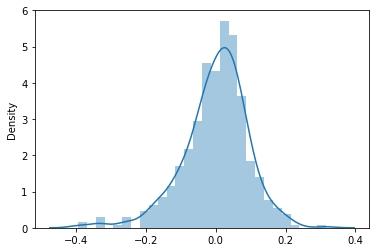

In [62]:
sns.distplot(res) 

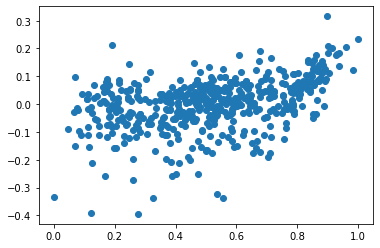

In [63]:
plt.scatter(x=y_train,y=res)

# We can say that the data is slightly normally distributed for training set

##  For X_test and evaluate

In [64]:

#create a list of numeric var

num_vars=['hum','temp','windspeed',
         'cnt']

#2 . fit on data
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [65]:
y_test=df_test.pop('cnt')
X_test=df_test

In [66]:


# Using the training cols for predictions
X_test_rfe_test = X_test[cols_supported]

In [67]:
X_test_rfe_test= sm.add_constant(X_test_rfe_test)

In [68]:
y_pred_test=lr_model.predict(X_test_rfe_test)

In [69]:
from sklearn.metrics import r2_score

In [70]:

r2_score(y_true= y_test , y_pred= y_pred_test)

0.7997625402835662

In [71]:
res=y_test - y_pred_test

<AxesSubplot:ylabel='Density'>

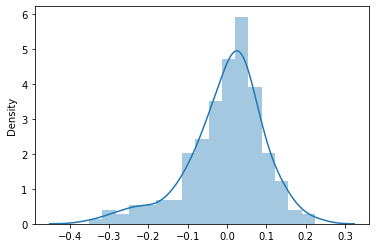

In [72]:
sns.distplot(res)

## R2 score for test set is 0.799 

### Scatter plot for y_test v Predictions

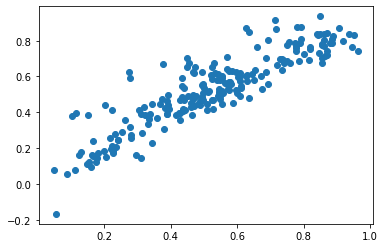

In [75]:
plt.scatter(x=y_test,y=y_pred_test)